# Understanding the Data

### Import the libraries

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.utils import np_utils

import matplotlib.pyplot as plt

### Load and Analyse the data 

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

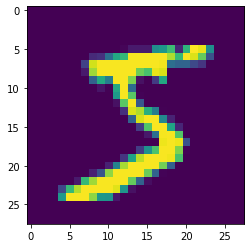

In [6]:
plt.imshow(x_train[0])

In [7]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')
x_test = x_test.reshape(10000,28,28,1).astype('float32')

### Applying One Hot Encoding

In [8]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Model Building

In [10]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(number_of_classes,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train, validation_data=(x_test, y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.2935 - accuracy: 0.9488 - val_loss: 0.0975 - val_accuracy: 0.9711
Epoch 2/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0744 - accuracy: 0.9779 - val_loss: 0.1115 - val_accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0507 - accuracy: 0.9843 - val_loss: 0.0944 - val_accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0880 - val_accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.1151 - val_accuracy: 0.9716


In [13]:
metrics = model.evaluate(x_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.11513716727495193, 0.9715999960899353]


In [14]:
prediction = model.predict(x_test[:4])
print(prediction)

[[1.29862754e-09 3.67102239e-19 2.43051603e-11 1.96501065e-10
  1.88409046e-16 6.83585781e-19 5.15895508e-18 1.00000000e+00
  1.60107788e-10 8.77573459e-13]
 [1.91051242e-07 2.84490648e-06 9.99928474e-01 2.02826982e-07
  9.36083977e-15 3.44186867e-11 6.51528899e-05 1.67571838e-19
  3.02999911e-06 6.33302525e-12]
 [8.30347080e-09 9.99765217e-01 1.20379343e-06 1.02692160e-11
  1.09046661e-04 4.87305307e-08 6.62707333e-10 6.33555297e-09
  1.24573329e-04 1.15147655e-10]
 [1.00000000e+00 6.84202849e-15 1.97067446e-10 2.47147748e-14
  2.44848933e-12 1.29827199e-11 2.55533683e-09 2.17129439e-12
  1.03979395e-11 8.52402238e-09]]


In [15]:
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
model.save('mnistCNN.h5')

In [17]:
!tar -zcvf image-classification-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [18]:
ls -l

total 4684
-rw-rw---- 1 wsuser wscommon 2314647 Nov 17 14:50 image-classification-model_new.tgz
-rw-rw---- 1 wsuser wscommon 2475368 Nov 17 14:50 mnistCNN.h5


In [19]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 19.5 MB/s eta 0:00:01


In [20]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"3VTS1NLKq0b_bF0ttXkdiMlFEFTEhB8GLZSAOqYPkFGK"
}
client = APIClient(wml_credentials)

In [21]:
client = APIClient(wml_credentials)

In [22]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [23]:
space_uid = guid_from_space_name(client, 'digitrecognition')
print("Space id = "+space_uid)

Space id = 12eac9d3-aede-4d1b-b5c6-a5886c4f2aba


In [24]:
client.set.default_space(space_uid)

'SUCCESS'

In [25]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [26]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [27]:
model_details = client.repository.store_model(model='image-classification-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id = client.repository.get_model_id(model_details)

In [28]:
model_id

'f1ff2abb-dca3-490c-a65a-6111861f25f5'

In [29]:
client.repository.download(model_id,'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

In [43]:
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [44]:
model = load_model("mnistCNN.h5")

In [45]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8h8ZrIgL0cMeIcYeSr_3rmoBfAvbRRv7F38H5NvlwIPk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageclassification-donotdelete-pr-jxtwseaypkq9fd'
object_key = '6.png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [46]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [47]:
img

In [48]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [49]:
pred = model.predict(im2arr)
print(pred)

[[3.3603758e-08 2.4816215e-08 5.8471810e-09 1.5037513e-07 1.1334360e-05
  5.1312727e-06 9.9998260e-01 2.2766361e-10 6.7210402e-07 9.3018343e-10]]


In [50]:
print(np.argmax(pred, axis=1))

[6]


In [53]:
pwd

'/home/wsuser/work'

In [54]:
ls

image-classification-model_new.tgz  mnistCNN.h5  my_model.tar.gz
